In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('euromillions_Fusion.csv',sep=';', encoding='ISO-8859-1')

In [3]:
df.head()

,annee_numero_de_tirage,jour_de_tirage,date_de_tirage,numï¿½ro_de_tirage_dans_le_cycle,date_de_forclusion,boule_1,boule_2,boule_3,boule_4,boule_5,...,nombre_de_gagnant_au_rang7_Etoile+,rapport_du_rang7_Etoile+,nombre_de_gagnant_au_rang8_Etoile+,rapport_du_rang8_Etoile+,nombre_de_gagnant_au_rang9_Etoile+,rapport_du_rang9_Etoile+,nombre_de_gagnant_au_rang10_Etoile+,rapport_du_rang10_Etoile+,numero_My_Million,numero_Tirage_Exceptionnel_Euro_Million
0,20244006,VENDREDI,19/01/2024,1,20/03/2024,50,27,28,48,44,...,10760,4,18046,"11,1",42691,"2,6",424081,"2,3",QE 911 6397,NaN
1,20244005,MARDI,16/01/2024,7,17/03/2024,18,21,33,45,10,...,8645,"4,4",13958,"12,7",39974,"2,5",328733,"2,7",CU 208 5890,NaN
2,20244004,VENDREDI,12/01/2024,6,13/03/2024,18,16,17,49,45,...,11446,"4,3",18344,"12,4",46653,"2,7",427062,"2,6",RT 208 4085,NaN
3,20244003,MARDI,09/01/2024,5,10/03/2024,12,9,2,39,40,...,9622,"3,8",15703,"10,8",41373,"2,3",339112,"2,4",LN 958 0675,NaN
4,20244002,VENDREDI,05/01/2024,4,06/03/2024,18,4,39,7,50,...,15613,"3,1",26334,"8,5",54128,"2,3",474691,"2,3",SA 454 2143,NaN


In [4]:
df_ligth = df[['boule_1','boule_2','boule_3','boule_4','boule_5','etoile_1','etoile_2']]

In [5]:
df_ligth.head()

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,50,27,28,48,44,7,12
1,18,21,33,45,10,12,8
2,18,16,17,49,45,9,12
3,12,9,2,39,40,3,1
4,18,4,39,7,50,8,3


In [6]:
for column in df_ligth.columns:
    counts = df_ligth[column].value_counts()
#    print(f"\nDistribution of {column}:\n{counts}")

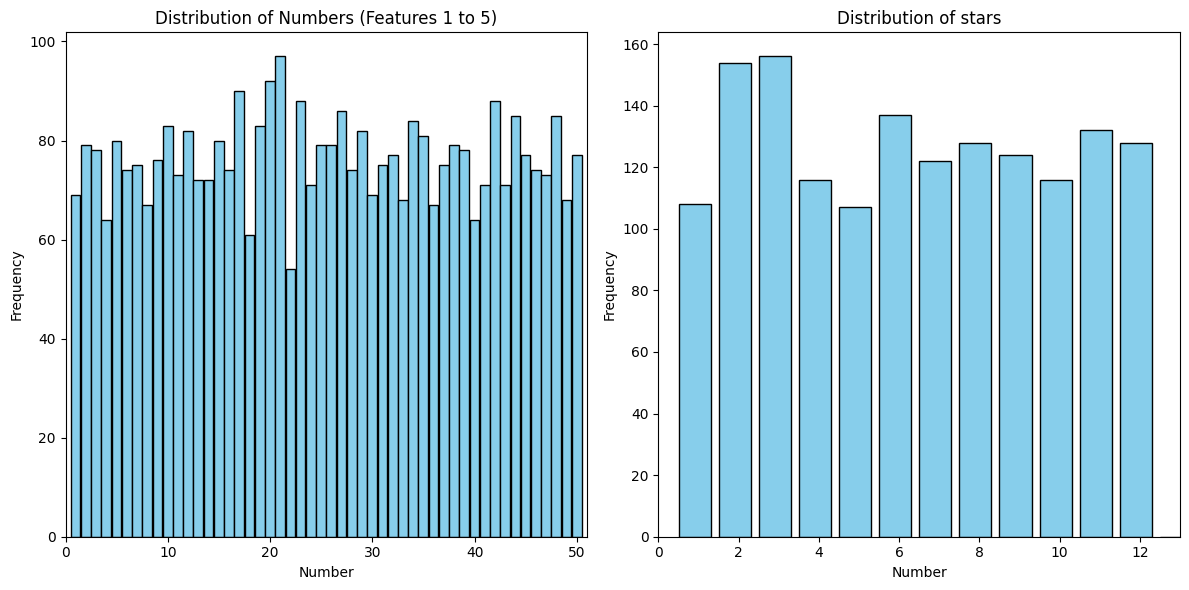

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

bin_edges = [edge - 0.5 for edge in range(df_ligth.min().min(), df_ligth.max().max() + 2)]
# Histogram for features 1 to 5
axes[0].hist(df_ligth.iloc[:, :5].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.95)
axes[0].set_title('Distribution of Numbers (Features 1 to 5)')
axes[0].set_xlabel('Number')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([0, 51])

# Histogram for features 6 and 7
hist_2 = axes[1].hist(df_ligth.iloc[:, 5:].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.8)
axes[1].set_title('Distribution of stars')
axes[1].set_xlabel('Number')
axes[1].set_ylabel('Frequency')

# Customize x-axis labels for the second subplot
# axes[1].set_xticks(hist_2[1])
# axes[1].set_xticklabels(hist_2[1])
axes[1].set_xlim([0, 13])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Create Data with a windows

In [8]:
# frequency of a number in the last window rows
def count_frequency(dataframe, windows):
    df_ = dataframe.copy()
    for col in ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']:
        df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    for col in ['etoile_1', 'etoile_2']:
        df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['etoile_1', 'etoile_2']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    return df_

In [9]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
762,35,44,17,37,43,10,2
763,41,6,13,39,9,2,12


In [10]:
df_ligth.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,50,27,28,48,44,7,12
1,18,21,33,45,10,12,8


In [11]:
df_ligth = df_ligth[::-1].reset_index(drop=True)

In [12]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
762,18,21,33,45,10,12,8
763,50,27,28,48,44,7,12


In [13]:
df_ligth.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,41,6,13,39,9,2,12
1,35,44,17,37,43,10,2


In [14]:
df_extend = count_frequency(df_ligth, windows = 12)

In [15]:
df_extend.shape

(764, 14)

In [16]:
df_extend.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,freq_boule_4,freq_boule_5,freq_etoile_1,freq_etoile_2
0,41,6,13,39,9,2,12,0,0,0,0,0,0,0
1,35,44,17,37,43,10,2,0,0,0,0,0,0,1


In [17]:
df_extend = df_extend.drop(['etoile_1', 'etoile_2', 'freq_etoile_1', 'freq_etoile_2'], axis = 1)

In [18]:
def quadra_dif(data):
  df_ = data.copy()
  columns_to_diff = ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']
  for i in range(0, df_.shape[0]):
    df_['sum_diff_r2'] = ((df_[columns_to_diff].diff(axis=1) ** 2).sum(axis=1)).astype(int)
  return df_

In [19]:
df_extend = quadra_dif(df_extend)

In [20]:
df_extend.head(3)

,boule_1,boule_2,boule_3,boule_4,boule_5,freq_boule_1,freq_boule_2,freq_boule_3,freq_boule_4,freq_boule_5,sum_diff_r2
0,41,6,13,39,9,0,0,0,0,0,2850
1,35,44,17,37,43,0,0,0,0,0,1246
2,4,38,7,14,34,0,0,0,0,0,2566


In [21]:
# How long the number didn't not appear
# def no_star(data):
#   df_ = data.copy()
#   for num in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
#     mask = ((df_['etoile_1'] == num) | (df_['etoile_2'] == num))
#     df_[f'no_s{num}'] = (~mask).groupby((mask).cumsum()).cumsum()
#     # df_[f'no_{num}'] = df_[f'no_{num}'].shift(fill_value=0).astype(int)
#   return df_

def no_ball(data):
  df_ = data.copy()
  for num in range(51):
    mask = ((df_['boule_1'] == num) | (df_['boule_2'] == num) | (df_['boule_3'] == num) | (df_['boule_4'] == num) | (df_['boule_5'] == num))
    df_[f'no_b{num}'] = (~mask).groupby((mask).cumsum()).cumsum()
  return df_

In [22]:
df_extend = no_ball(df_extend)

In [23]:

df_extend.head(3)

,boule_1,boule_2,boule_3,boule_4,boule_5,freq_boule_1,freq_boule_2,freq_boule_3,freq_boule_4,freq_boule_5,...,no_b41,no_b42,no_b43,no_b44,no_b45,no_b46,no_b47,no_b48,no_b49,no_b50
0,41,6,13,39,9,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
1,35,44,17,37,43,0,0,0,0,0,...,1,2,0,0,2,2,2,2,2,2
2,4,38,7,14,34,0,0,0,0,0,...,2,3,1,1,3,3,3,3,3,3


In [24]:
df_extend.columns

Index(['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5', 'freq_boule_1',
       'freq_boule_2', 'freq_boule_3', 'freq_boule_4', 'freq_boule_5',
       'sum_diff_r2', 'no_b0', 'no_b1', 'no_b2', 'no_b3', 'no_b4', 'no_b5',
       'no_b6', 'no_b7', 'no_b8', 'no_b9', 'no_b10', 'no_b11', 'no_b12',
       'no_b13', 'no_b14', 'no_b15', 'no_b16', 'no_b17', 'no_b18', 'no_b19',
       'no_b20', 'no_b21', 'no_b22', 'no_b23', 'no_b24', 'no_b25', 'no_b26',
       'no_b27', 'no_b28', 'no_b29', 'no_b30', 'no_b31', 'no_b32', 'no_b33',
       'no_b34', 'no_b35', 'no_b36', 'no_b37', 'no_b38', 'no_b39', 'no_b40',
       'no_b41', 'no_b42', 'no_b43', 'no_b44', 'no_b45', 'no_b46', 'no_b47',
       'no_b48', 'no_b49', 'no_b50'],
      dtype='object')

In [25]:
# Function to create sequences for X and y
def create_sequences(data, length):
    X,Y = [],[]
    for i in range(len(data)-length):
        X.append(data.iloc[i:i+length, 0:data.shape[1]].values)
        Y.append(data.iloc[i+length, 0:5])

    return np.array(X),np.array(Y)

# Define the sequence length
rows_windows = 12

# Create sequences for X and y
X, y = create_sequences(df_extend, rows_windows)

# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (752, 12, 62)
y shape: (752, 5)


In [26]:
print(X[-1])

[[  48   30   50   42   17    2    2    4    1    0 1413  752   27    6
    22    1   11    1   11    9   20    2    9    3    7    2    4    3
     0   13    5    1    8   17   21    1    1    6    3   14    4    0
    10   20    3    5   12    7   28    2    4   11   16    0   17    3
    14    5    5    0   12    0]
 [  43   39   28   37    6    0    3    0    0    1 1179  753   28    7
    23    2   12    0   12   10   21    3   10    4    8    3    5    4
     1   14    6    2    9   18   22    2    2    7    4    0    5    1
    11   21    4    6   13    8    0    3    0   12   17    1    0    4
    15    6    6    1   13    1]
 [   2   13   37   38   48    1    1    1    2    2  798  754   29    0
    24    3   13    1   13   11   22    4   11    5    0    4    6    5
     2   15    7    3   10   19   23    3    3    8    5    1    6    2
    12   22    5    7   14    9    0    0    1   13   18    2    1    5
    16    7    7    0   14    2]
 [  20   43   41   45   10    2    1 

In [27]:
print(y[-1])

[50 27 28 48 44]


In [28]:
# Scaled data because StandardScaler expected <= 2 dim
from sklearn.model_selection import train_test_split

X_scaled = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, shuffle=False)

In [29]:
print('X_train:', X_train.shape, 'X_test:', X_test.shape)
print('y_train:', y_train.shape, 'y_test:', y_test.shape)

X_train: (714, 12, 62) X_test: (38, 12, 62)
y_train: (714, 5) y_test: (38, 5)


##Model: TSLM

In [30]:
# LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the model
def my_LSTM(units, window_length, nb_label_feature, nb_label, dropout):

    model = Sequential()

    # We add two layers of LSTM
    model.add(LSTM(units=units, input_shape=(window_length, nb_label_feature), return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(units=units, return_sequences=False))
    # Output layer
    model.add(Dense(units=nb_label))

    return model

In [ ]:
# def adapt_learning_rate(epoch):
#     if epoch < 500:
#       return 0.0005
#     elif epoch < 1000:
#       return 0.0001
#     else:
#       return 0.00005

# my_lr_scheduler = LearningRateScheduler(adapt_learning_rate)

In [31]:
units = 1024
window_length = rows_windows
nb_feature = X_train.shape[2]
nb_label = y.shape[1]
DROPOUT = 0.2
BATCHSIZE = 16
EPOCHS = 1000
OPTIMIZER  = Adam(learning_rate=0.0002)#'rmsprop'#
# ACTIVATION = 'softmax'
LOSS = 'mean_squared_error'

In [32]:
model = my_LSTM(units, window_length, nb_feature, nb_label, DROPOUT)
model.compile(loss = LOSS, optimizer = OPTIMIZER, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 1024)          4452352   
                                                                 
 dropout (Dropout)           (None, 12, 1024)          0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 1024)          8392704   
                                                                 
 dropout_1 (Dropout)         (None, 12, 1024)          0         
                                                                 
 lstm_2 (LSTM)               (None, 12, 1024)          8392704   
                                                                 
 dropout_2 (Dropout)         (None, 12, 1024)          0         
                                                                 
 lstm_3 (LSTM)               (None, 1024)              8

In [34]:
# # Define early stopping

# early_stop = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)

In [35]:
# history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test, y_test), callbacks=[early_stop, my_lr_scheduler], verbose=1)
# model.save('test'+'.h5')

In [33]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE)
model.save(f'test_valid_test_number_{units}_{BATCHSIZE}_{window_length}_{DROPOUT}'+'.h5')

Epoch 1/1000
45/45 [==============================] - 11s 35ms/step - loss: 520.2986 - accuracy: 0.1835
Epoch 2/1000
45/45 [==============================] - 2s 33ms/step - loss: 246.7454 - accuracy: 0.1807
Epoch 3/1000
45/45 [==============================] - 2s 34ms/step - loss: 206.1713 - accuracy: 0.2255
Epoch 4/1000
45/45 [==============================] - 2s 37ms/step - loss: 205.0151 - accuracy: 0.2129
Epoch 5/1000
45/45 [==============================] - 2s 35ms/step - loss: 204.7682 - accuracy: 0.2283
Epoch 6/1000
45/45 [==============================] - 2s 34ms/step - loss: 204.2732 - accuracy: 0.2255
Epoch 7/1000
45/45 [==============================] - 2s 33ms/step - loss: 204.2456 - accuracy: 0.2045
Epoch 8/1000
45/45 [==============================] - 2s 34ms/step - loss: 203.8145 - accuracy: 0.2409
Epoch 9/1000
45/45 [==============================] - 2s 34ms/step - loss: 203.8675 - accuracy: 0.2115
Epoch 10/1000
45/45 [==============================] - 2s 35ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


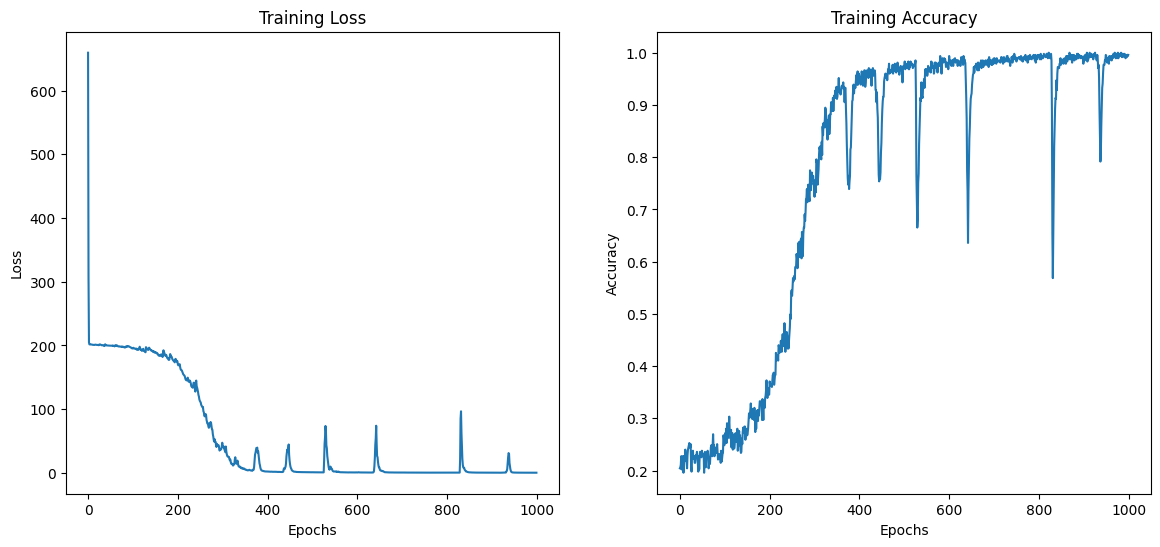

In [37]:
# Plotting the training and validation loss
# plt.figure(figsize=(10, 8))
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(history.history['loss'], label='Loss')
# axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')

# plot 2
axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].set_title('Training Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

plt.show()

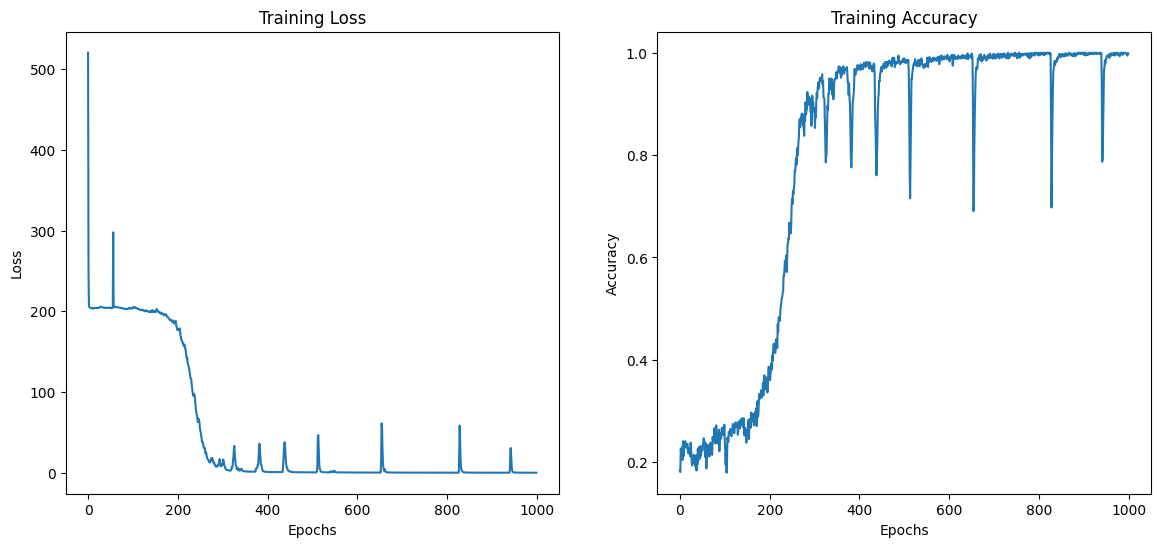

In [34]:
# Plotting the training and validation loss
# plt.figure(figsize=(10, 8))
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(history.history['loss'], label='Loss')
# axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')

# plot 2
axs[1].plot(history.history['accuracy'], label='accuracy')
axs[1].set_title('Training Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')

plt.show()

In [35]:
predictions = model.predict(X_test)

2/2 [==============================] - 1s 11ms/step


In [ ]:
# for idx in range(0, y_test.shape[0]):
#   predicted = np.round(predictions[idx]).astype(int)
#   print(f'row {idx}:----------------------------------------------------------','\ny_pred', predicted, '\ny_test', y_test[idx], '\nvalid ',np.isin(np.round(predictions[idx,:5]).astype(int), y_test[idx,:5]), np.isin(np.round(predictions[idx,-2:]).astype(int), y_test[idx,-2:]))

In [58]:
def post_traitement(predic):
    predicted = []
    for idx in range(y_test.shape[0]):
        array = np.clip(np.round(predic[idx]).astype(int), 1, 50)

        unique_values, counts = np.unique(array[:5], return_counts=True)
        duplicates_exist = any(counts > 1)
        # unique_star, counts_s = np.unique(array[-2:], return_counts=True)
        # duplicates_star = any(counts_s > 1)
        if duplicates_exist:
            duplicate_indices = np.where(np.isin(array[:5], unique_values[counts > 1]))[0]
            val0 = (predic[idx][duplicate_indices[0]] - array[duplicate_indices[0]])**2
            val1 = (predic[idx][duplicate_indices[1]] - array[duplicate_indices[1]])**2

            # Update array based on minimizing squared differences
            if val0 < val1:
                array[duplicate_indices[1]] += 1 if (predic[idx][1] > array[duplicate_indices[1]] and ((array[duplicate_indices[1]] + 1) not in array[:5])) else -1
            else:
                array[duplicate_indices[0]] += 1 if (predic[idx][0] > array[duplicate_indices[0]] and ((array[duplicate_indices[0]] + 1) not in array[:5])) else -1

        # if duplicates_star:
        #     star_indices = np.where(np.isin(array[-2:], unique_star[counts_s > 1]))[0]
        #     star0 = (predic[idx][star_indices[0]] - array[star_indices[0]])**2
        #     star1 = (predic[idx][star_indices[1]] - array[star_indices[1]])**2

        #     # Update array based on minimizing squared differences
        #     if star0 < star1:
        #         array[star_indices[1]+5] += 1 if predic[idx][1] > array[star_indices[1]+5] else -1
        #     else:
        #         array[star_indices[0]+5] += 1 if predic[idx][0] > array[star_indices[0]+5] else -1

        #Printing results for test
        print(f'row {idx}:----------------------------------------------------------','\ny_pred', array, '\ny_test', y_test[idx], '\nvalid ',np.isin(array[:5], y_test[idx,:5]))
        # Append the processed array to the predicted list
        predicted.append(array)

    return predicted

In [59]:
predictions[16]

array([32.71173 , 26.496458, 35.34165 , 32.63096 , 17.386703],
      dtype=float32)

In [60]:
predictions[23]

array([35.199577, 13.591708, 33.04176 , 34.75942 , 14.395877],
      dtype=float32)

In [61]:
prediction_test = post_traitement(predictions)

[38 42  9 12 29]
[ 9 12 29 38 42] [1 1 1 1 1]
row 0:---------------------------------------------------------- 
y_pred [38 42  9 12 29] 
y_test [14  5 42 36 40] 
valid  [False  True False False False]
[29 20 39 41 36]
[20 29 36 39 41] [1 1 1 1 1]
row 1:---------------------------------------------------------- 
y_pred [29 20 39 41 36] 
y_test [21 45 12 48 14] 
valid  [False False False False False]
[39 40 24 32 46]
[24 32 39 40 46] [1 1 1 1 1]
row 2:---------------------------------------------------------- 
y_pred [39 40 24 32 46] 
y_test [10 31 41 15 42] 
valid  [False False False False False]
[34 32 14 36 17]
[14 17 32 34 36] [1 1 1 1 1]
row 3:---------------------------------------------------------- 
y_pred [34 32 14 36 17] 
y_test [ 3 23 35 34 24] 
valid  [ True False False False False]
[41 46 25  6 16]
[ 6 16 25 41 46] [1 1 1 1 1]
row 4:---------------------------------------------------------- 
y_pred [41 46 25  6 16] 
y_test [14  6 23  2 19] 
valid  [False False False  True Fa